#**job_listings.csv Dataset Analysis (2025)**



# **1️⃣ Introduction**
# 📌 Objective:

*   Analyzing remote job trends
*   Identifying most in-demand skills
*   Understanding job location requirements
*   Data Source: RemoteOK API

### Why This Matters: Helps job seekers & data analysts understand remote job trends






# **2️⃣ Importing Libraries**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Data Loading & Cleaning
### Load CSV into Pandas

In [2]:
import pandas as pd
df = pd.read_csv("job_listings.csv")

In [4]:
df.head()

,Job Title,Company,Location,Company Logo,Tags
0,Customer Support Advocate,brightwheel,US Only,https://remoteok.com/assets/img/jobs/7e5ea3c7b...,"teacher, technical, support, financial, educat..."
1,Admin and Support Specialist,Interaction Design Foundation,NaN,https://remoteOK.com/assets/img/jobs/b4b50af98...,"customer support, admin"
2,Customer Care Advisor,GoodLeap,Remote,https://remoteok.com/assets/img/jobs/28eaa065f...,"supervisor, support, developer, software, mana..."
3,Senior Full stack Developer,Lemon.io,NaN,https://remoteOK.com/assets/img/jobs/c252eace1...,"engineer, senior, dev, javascript, backend, fr..."
4,Senior Systems Engineer,Nansen.ai,"London, England, United Kingdom",https://remoteok.com/assets/img/jobs/6d2ad80e5...,"system, security, test, growth, code, cloud, m..."


# **Column Overview**

Job Title ->  Contains 99 non-null values.

Company -> Contains 99 non-null values.

Location ->  Contains 62 non-null values (37 missing).

Company Logo -> Contains 88 non-null values (11 missing).

Tags -> Contains 99 non-null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job Title     99 non-null     object
 1   Company       99 non-null     object
 2   Location      62 non-null     object
 3   Company Logo  88 non-null     object
 4   Tags          99 non-null     object
dtypes: object(5)
memory usage: 4.0+ KB


In [7]:
df.describe()

,Job Title,Company,Location,Company Logo,Tags
count,99,99,62,88,99
unique,92,75,43,88,96
top,Sales Development Representative,Hostaway,Remote,https://remoteok.com/assets/img/jobs/7e5ea3c7b...,"saas, growth, sales, health, executive"
freq,3,8,10,1,2


### Check Missing Values & Fix Them

In [3]:
df.isnull().sum()

,0
Job Title,0
Company,0
Location,37
Company Logo,11
Tags,0


In [8]:
df["Location"] = df["Location"].fillna("Unknown")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job Title     99 non-null     object
 1   Company       99 non-null     object
 2   Location      99 non-null     object
 3   Company Logo  88 non-null     object
 4   Tags          99 non-null     object
dtypes: object(5)
memory usage: 4.0+ KB


# **Exploratory Data Analysis (EDA)**

## Most Common Job Titles are...

This dataset contains information about different job titles and their frequency.
Below is a breakdown of the most common roles:

Sales Development Representative: 3 positions available

Senior DevOps Engineer: 2 positions available

UX/UI Designer: 2 positions available

Power Apps Specialist: 2 positions available

Principal Engineer Core Platform EMEA: 2 positions available

This suggests that the Sales Development Representative role is the most frequently listed job, while the other roles have equal representation.

In [14]:
df['Job Title'].value_counts().head()

,count
Job Title,
Sales Development Representative,3
Senior DevOps Engineer,2
UX UI Designer,2
Power Apps Specialist,2
Principal Engineer Core Platform EMEA,2


<Axes: ylabel='Job Title'>

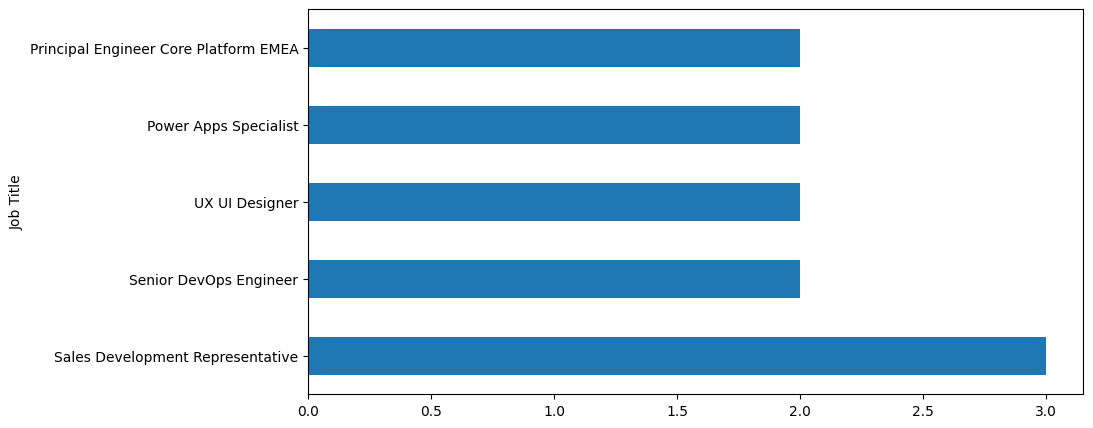

In [12]:
df['Job Title'].value_counts().head().plot(kind="barh", figsize=(10,5))

# Top Job Locations



This dataset provides information about the number of job listings based on location.

Unknown: 37 listings (largest category with unspecified locations)

Remote: 10 listings (jobs that can be done from anywhere)

New York City, NY, USA: 4 listings

United States (General, no specific city): 3 listings

## **Insights**
A significant number (37%) of job locations are unknown, which may require further investigation or data cleaning.

Remote jobs account for 10%, indicating flexibility in work location.



In [20]:
df["Location"].value_counts().head(10)

,count
Location,
Unknown,37
Remote,10
"New York City, New York, United States",4
United States,3
Hyderabad,2
"London, England, United Kingdom",2
"San Francisco Bay Area, California, United States",2
Gurugram,2
"Burlington, Ontario, Canada",2


<Axes: xlabel='Location'>

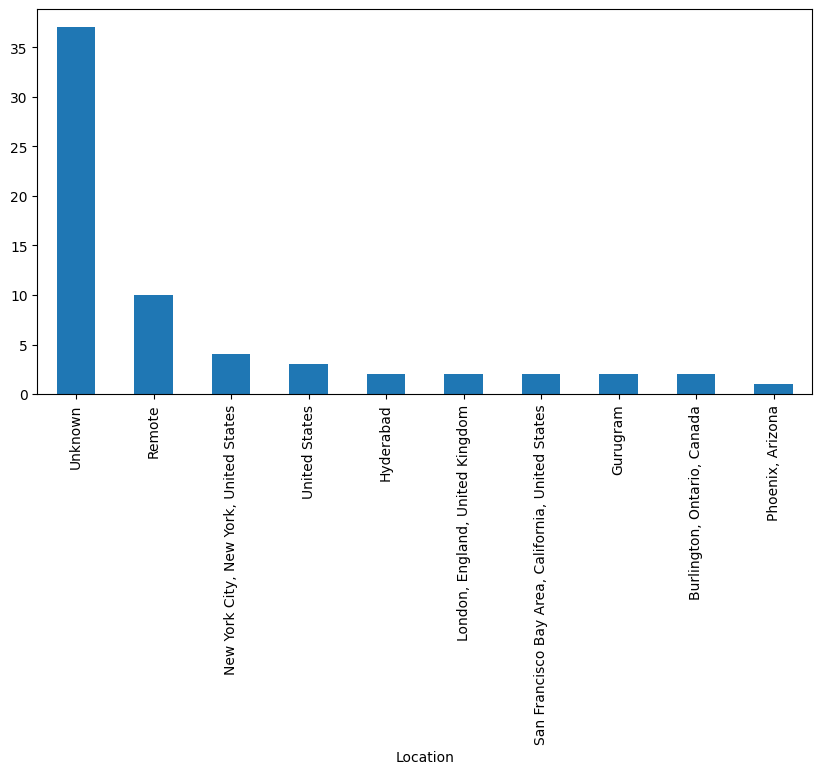

In [19]:
df["Location"].value_counts().head(10).plot(kind="bar", figsize=(10,5))

## **Most In-Demand Skills (Tags Analysis)**

After analyzing the "Tags" column, we identified the most frequently occurring keywords associated with job listings. Here are the top 4 tags -->

Growth

Technical

Engineer

Support


## Key Observations -->
"Growth" and "Technical" are the most common tags, indicating that many roles focus on technical skills and business growth.

"Engineer" appears frequently, suggesting a high demand for engineering-related roles.

"Support" is also prevalent, implying demand for customer or technical support positions.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job Title     99 non-null     object
 1   Company       99 non-null     object
 2   Location      99 non-null     object
 3   Company Logo  88 non-null     object
 4   Tags          99 non-null     object
dtypes: object(5)
memory usage: 4.0+ KB


<Axes: >

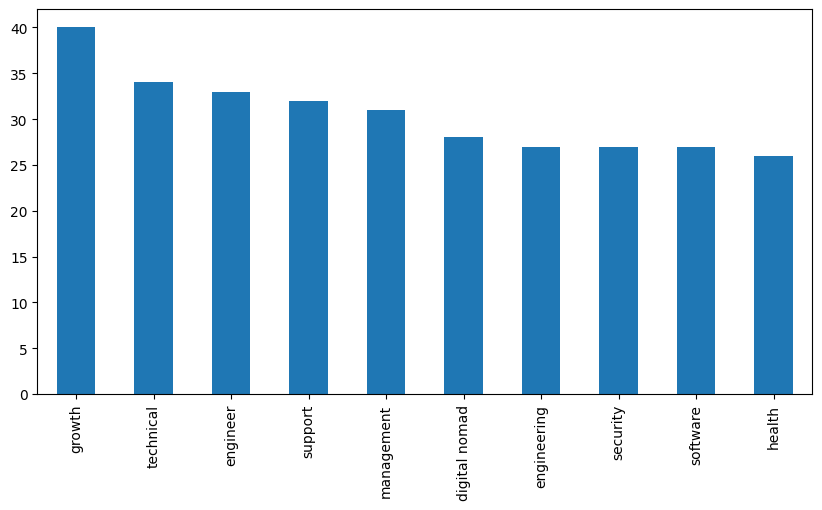

In [23]:
from collections import Counter
all_tags = df["Tags"].str.split(", ").sum()
tag_counts = Counter(all_tags)
pd.Series(tag_counts).sort_values(ascending=False).head(10).plot(kind="bar", figsize=(10,5))

# Key Insights & Final Thoughts

*   Engineering, Growth, and Technical are the most common job tags.
*   Sales Development Representative is the most listed job, followed by engineering and support roles.
*   37% of job listings lack location data, requiring cleaning.
*   10% of jobs are remote, but many have geographic restrictions.
*   Major job hubs include New York City, San Francisco, London, Hyderabad, and Gurugram.
*   High demand for Python, JavaScript, SQL, and Cloud Computing skills.
*   Engineering and growth-focused roles dominate the market.
*   The dataset helps job seekers and recruiters understand hiring trends.

















